In [3]:
import numpy as np
import pandas as pd

def jack(f,X,n):
    h = 0.000001
    arr1 = []
    for i in range(n):
        arr2 = []
        for j in range(n):
            lhsx = X.copy()
            lhsx[j] += h
            rhsx = X.copy()
            rhsx[j] -= h
            arr2.append((f(lhsx)[i,0]-f(rhsx)[i,0])/(2*h))
        arr1.append(arr2)
    return np.array(arr1)

def main(f, x_ini = None, n = 5, range_ = [1,5], max_itr = 100, epsilon = 0.0000001, precision = 15):
    try:
        if x_ini == None:
            initial = np.random.uniform(range_[0], range_[1],n)
        else :
            initial = np.array(x_ini)
    except :
        initial = np.array(x_ini)
    print('Initial value taken as \n', initial, '\n')
    
    #third order
    X = initial.copy()
    ct = 1
    third_order_cache = []
    ca_3 = X
    while np.linalg.norm(f(X)) > epsilon and ct < max_itr :
        #print(' itr_ct = ', ct,'\n','Soln = ',X)
        third_order_cache.append(np.linalg.norm(f(X)))
        x_k = np.array([[i] for i in X])
        y_k = x_k - 0.5*np.linalg.inv(jack(f,X,n))@f(X)
        Y = np.squeeze(y_k)
        X = np.squeeze(x_k - np.linalg.inv(jack(f,Y,n))@f(X))
        ct += 1
        ca_3 = np.vstack((ca_3,X))
    x = [round(i,precision) for i in X]
    print('For Third order model Solution is ', '\n', x,'\n')
    third_order_cache.append(np.linalg.norm(f(X)))
    
    
    #sixth order
    X = initial.copy()
    ct = 1
    sixth_order_cache = []
    ca_6 = X
    while np.linalg.norm(f(X)) > epsilon and ct < max_itr :
        sixth_order_cache.append(np.linalg.norm(f(X)))
        x_k = np.array([[i] for i in X])
        y_k = x_k - np.linalg.inv(jack(f,X,n))@f(X)
        Y = np.squeeze(y_k)
        z_k = y_k - np.linalg.inv(jack(f,X,n))@(2*np.eye(n) - jack(f,Y,n)\
                            @np.linalg.inv(jack(f,X,n)))@f(Y)
        Z = np.squeeze(z_k)
        X = np.squeeze(z_k - np.linalg.inv(jack(f,Y,n))@f(Z))
        ct += 1
        ca_6 = np.vstack((ca_6,X))
    x = [round(i,precision) for i in X]
    print('For Sixth order model Solution is ','\n', x,'\n')
    sixth_order_cache.append(np.linalg.norm(f(X)))
    
    #fifth order
    X = initial.copy()
    ct = 1
    fifth_order_cache = []
    ca_5 = X
    while np.linalg.norm(f(X)) > epsilon and ct < max_itr :
        fifth_order_cache.append(np.linalg.norm(f(X)))
        x_k = np.array([[i] for i in X])
        y_k = x_k - np.linalg.inv(jack(f,X,n))@f(X)
        Y = np.squeeze(y_k)
        z_k = x_k - 2*np.linalg.inv(jack(f,X,n)+jack(f,Y,n))@f(X)
        Z = np.squeeze(z_k)
        X = np.squeeze(z_k - np.linalg.inv(jack(f,Y,n))@f(Z))
        ct += 1
        ca_5 = np.vstack((ca_5,X)) 
    x = [round(i,precision) for i in X]
    print('For Fifth order model Solution is ', '\n',x, '\n')
    fifth_order_cache.append(np.linalg.norm(f(X)))
    
    #proposed model 
    #modified fifth order
    X = initial.copy()
    ct = 1
    modified_fifth_order_cache = []
    ca_5pr = X
    while np.linalg.norm(f(X)) > epsilon and ct < max_itr :
        
        modified_fifth_order_cache.append(np.linalg.norm(f(X)))
        x_k = np.array([[i] for i in X])
        jacobian = jack(f,X,n)
        
        a = True
        while a:
            f_x = np.squeeze(f(X))
        
            lambd = np.random.uniform(-1,1,n)
            for i in range(n):
                if f_x[i]*jacobian[i,i] >= 0:
                    lambd[i] = abs(lambd[i])
                elif f_x[i]*jacobian[i,i] < 0:
                    lambd[i] = -abs(lambd[i])

            try :
                b = np.linalg.inv(np.diag(lambd*f_x)+jack(f,X,n))
                a = False
            except :
                pass
            
        y_k = x_k - 0.5*b@f(X)
        Y = np.squeeze(y_k)
        
        a = True
        while a:
            mu = np.random.uniform(-0.01, 0.01, n)
            for i in range(n):
                if jacobian[i,i] >= 0:
                    mu[i] = abs(mu[i])
                else:
                    mu[i] = -abs(mu[i])                
            try :
                c = np.linalg.inv(np.diag(mu*f_x*f_x)+jack(f,Y,n)+jack(f,X,n))
                a = False
            except :
                pass
        
        z_k = x_k - 2*c@f(X)
        Z = np.squeeze(z_k)
        
        jacobian = jack(f,Y,n)
        a = True
        while a:
            f_y = np.squeeze(f(Y))
        
            eta = np.random.uniform(-0.01,0.01,n)
            for i in range(n):
                if f_y[i]*jacobian[i,i] >= 0:
                    eta[i] = abs(eta[i])
                else:
                    eta[i] = -abs(eta[i])

            try :
                b = np.linalg.inv(np.diag(eta*f_y)+jack(f,Y,n))
                a = False
            except :
                pass
            
        X = np.squeeze(z_k - b@f(Z))
        ct += 1
        ca_5pr = np.vstack((ca_5pr,X))
        
    x = [round(i,precision) for i in X]
    print('For Modified Proposed Fifth order model Solution is ', '\n',x, '\n')
    modified_fifth_order_cache.append(np.linalg.norm(f(X)))    
    
    return [third_order_cache, fifth_order_cache, sixth_order_cache, \
            modified_fifth_order_cache], [pd.DataFrame(ca_3), pd.DataFrame(ca_5),\
                                          pd.DataFrame(ca_6), pd.DataFrame(ca_5pr)]

def convergence_viewer(li):
    pad = len(max(li, key=len))
    data_df = np.array([i + [0]*(pad-len(i)) for i in li])
    df = pd.DataFrame(data_df.T, columns=['3rd', '5th', '6th', 'Mo 5th'])
    df.plot(figsize = (10,10))
    return df
def individual_conv_viewer(list_df):
    li = ['3rd', '5th', '6th', 'Mo 5th']
    for i in range(4):
        list_df[i].columns = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
        k = list_df[i].plot(figsize = (10,10), title = li[i])
        

Initial value taken as 
 [15 15 15 15 15] 

For Third order model Solution is  
 [15.882054392910893, 12.941055800239033, 10.043726092900089, 5.177659795500607, 2.7808151413986] 

For Sixth order model Solution is  
 [15.902977127494202, 12.962217993933345, 10.06234086171974, 5.215082009900537, 2.535013644867596] 

For Fifth order model Solution is  
 [15.901650414691268, 12.960873823963084, 10.061157151418309, 5.214431752120907, 2.548903714588352] 

For Modified Proposed Fifth order model Solution is  
 [15.886244430420357, 12.94502991091461, 10.047066716910802, 4.930823115537539, 2.988939325734601] 



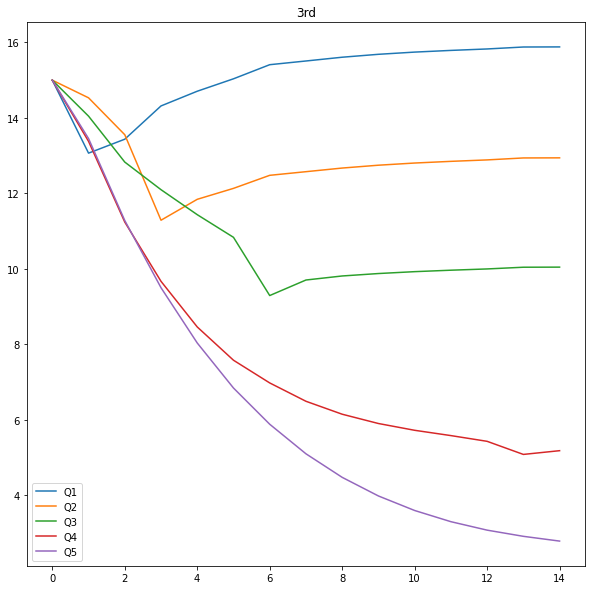

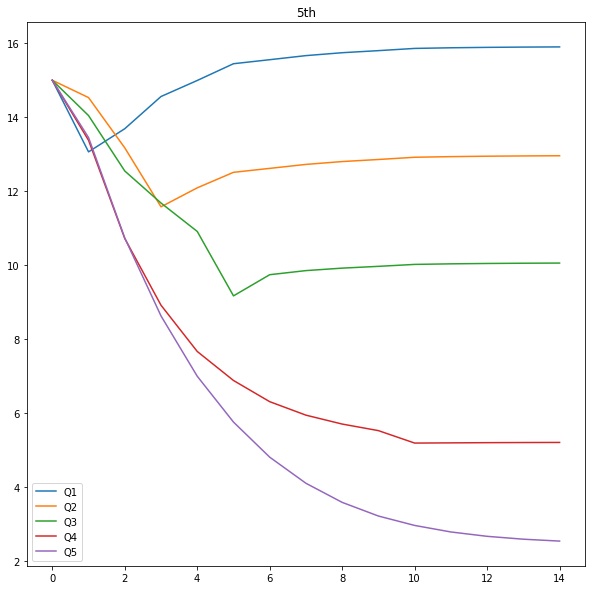

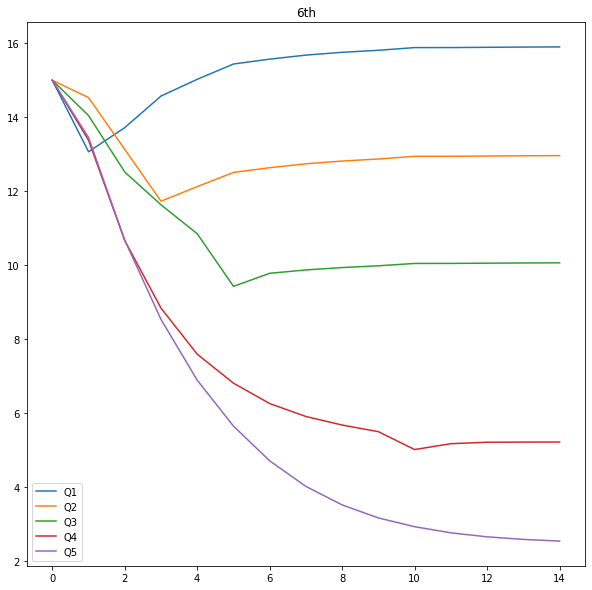

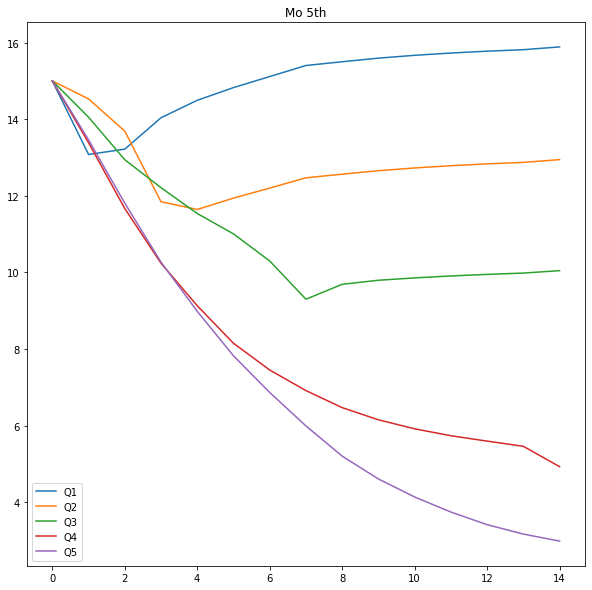

In [4]:
beta_i = [1.2, 1.1, 1, 0.8, 0.6]
n_i = [10,8,6,4,2]
L_i = [5]*5

#############################################

def f1(x):
    ret = []
    for ind in range(5):
        f = n_i[ind] + (L_i[ind]*x[ind])**(1/beta_i[ind]) - (5000/sum(x))**(1/1.1)\
                + x[ind]*((5000/sum(x))**(1/1.1))/(sum(x)*1.1)
        val = (f - x[ind])**6 - (f*abs(f))**3 - (x[ind]*abs(x[ind]))**3
        ret.append(val)
    return np.reshape(np.array(ret),(5,1))

##############################################

#x1 = [22.80131895, 21.79207665, 23.86543339, 18.61029054, 16.54479706]
    
li,df_l = main(f1, n = 5, x_ini=[15]*5, max_itr= 15, epsilon = 0.00001, precision = 15)
#convergence_viewer(li).head(20)

individual_conv_viewer(df_l)